<a href="https://colab.research.google.com/github/vanamalamanish/Machine_learning/blob/main/Youtube_Addview_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
#loading data set
data_train = pd.read_csv("/content/train.csv")

In [3]:
#retriving first five rows using head() method

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
data_train.shape # shape of dataset

(14999, 9)

In [5]:
#changing the categorical data to numerical data in category
c={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"]=data_train["category"].map(c)

In [6]:
# removing the rows having F values i.e., NA values
data_train = data_train[data_train.views!='F']
data_train = data_train[data_train.likes!='F']
data_train = data_train[data_train.dislikes!='F']
data_train = data_train[data_train.comment!='F']

In [7]:
#converting string data to numerical data
data_train['views'] = pd.to_numeric(data_train['views'])
data_train['comment'] = pd.to_numeric(data_train['comment'])
data_train['likes'] = pd.to_numeric(data_train['likes'])
data_train['dislikes'] = pd.to_numeric(data_train['dislikes'])
data_train['adview'] = pd.to_numeric(data_train['adview'])

In [8]:
from sklearn.preprocessing import LabelEncoder
#converting video id and published attributes to numerical data using LabelEncoder
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published']) 

In [9]:
data_train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,PT7M37S,6
1,2741,2,1707,56,2,6,2185,PT9M30S,4
2,8138,1,2023,25,0,2,2094,PT2M16S,3
3,9005,6,620860,777,161,153,2119,PT4M22S,8
4,122,1,666,1,0,0,2091,PT31S,4
...,...,...,...,...,...,...,...,...,...
14994,9869,2,525949,1137,83,86,1683,PT6M10S,1
14995,11758,1,665673,3849,156,569,1838,PT3M56S,4
14996,13263,4,3479,16,1,1,1053,PT3M13S,2
14997,6736,1,963,0,0,0,222,PT26S,7


In [10]:

import datetime
import time 

In [11]:
#The below function converts duration to numerical value in terms of seconds
def checki(x):
  y=x[2:]
  h,m,s,mm='','','',''
  p=['H','M','S']
  for i in y:
    if i not in p:
      mm+=i
    else:
      if i=="H":
        h=mm
        mm=''
      elif i=='M':
        m=mm
        mm=''
      else:
        s=mm
        mm=''
  if h=='':
    h='00'
  if m=='':
    m='00'
  if s=='':
    s='00'
  bp=h+':'+m+':'+s
  return bp

In [12]:
def func_sec(time_string):
  h,m,s=time_string.split(":")
  return int(h)*3600+int(m)*60+int(s)

In [13]:
time = data_train['duration'].apply(checki)

data_train['duration']=time.apply(func_sec)

In [14]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


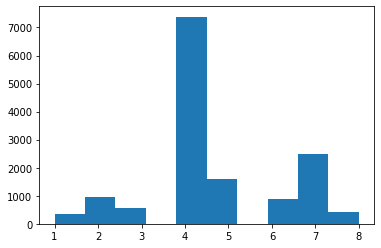

In [15]:
plt.hist(data_train['category'])
plt.show()

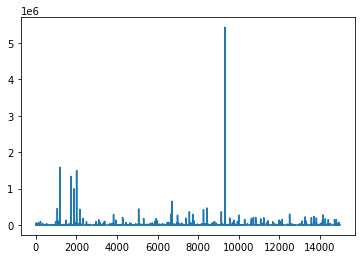

In [17]:
#we can see some outliers
plt.plot(data_train['adview'])
plt.show()

In [18]:
data_train = data_train[data_train['adview']<200000]
data_train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4
...,...,...,...,...,...,...,...,...,...
14994,9869,2,525949,1137,83,86,1683,370,1
14995,11758,1,665673,3849,156,569,1838,236,4
14996,13263,4,3479,16,1,1,1053,193,2
14997,6736,1,963,0,0,0,222,26,7


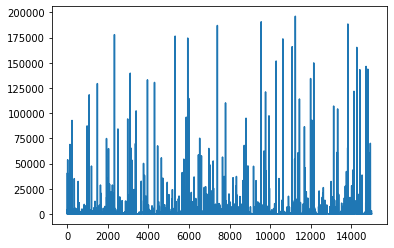

In [ ]:
plt.plot(data_train['adview'])
plt.show()

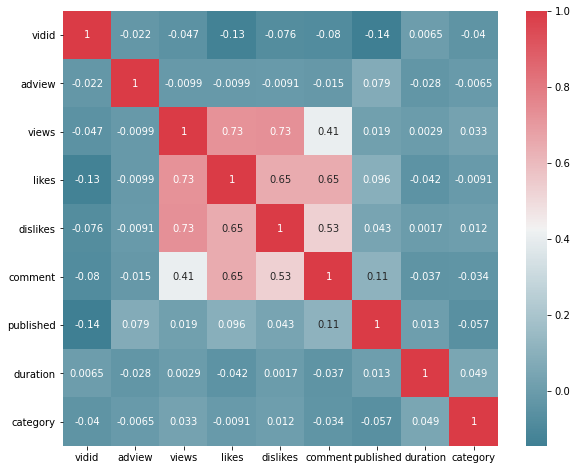

In [19]:
#finding the correlation between the different attributes and ploting it using heatmap
import seaborn as sns
f,ax = plt.subplots(figsize=(10,8))
corr = data_train.corr()
sns.heatmap(corr, mask = np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)

In [22]:
Y_train = pd.DataFrame(data=data_train.iloc[:, 1].values,columns=['target'])

Y_train

,target
0,40
1,2
2,1
3,6
4,1
...,...
14605,2
14606,1
14607,4
14608,1


In [23]:
#spliting the data set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_train,Y_train,test_size=0.2,random_state=42)
x_train,y_train

(       vidid  adview    views  likes  ...  comment  published  duration  category
 14149    574       1     1010     18  ...        2       2316       249         4
 1404     830       1     9061    115  ...        5       1125       538         4
 757    10224       5   960475    621  ...       73       1174      2650         4
 8618   12287       2   218769    992  ...     1776       2171       668         4
 3605   13490       1  1743759   1570  ...       68       1817      7945         4
 ...      ...     ...      ...    ...  ...      ...        ...       ...       ...
 5326    9797       1    32256     38  ...       12       2150       113         3
 13773  10801       3     4476     10  ...        0       2126       329         4
 5532    4367       1     6747    153  ...       51       1296       721         5
 883     6599       2  1361366   1384  ...      185       2145       240         7
 7459    6088       1    53180   1244  ...       49       1865       480         6
 
 [

In [24]:
x_train.shape

(11688, 9)

In [25]:
#scaling the data to fit in the model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)
x_train,y_train

(array([[3.91527161e-02, 0.00000000e+00, 6.96135585e-06, ...,
         9.71872376e-01, 5.88416003e-03, 4.28571429e-01],
        [5.66450290e-02, 0.00000000e+00, 6.52817263e-05, ...,
         4.71872376e-01, 1.27135667e-02, 4.28571429e-01],
        [6.98530919e-01, 2.03902698e-05, 6.95719788e-03, ...,
         4.92443325e-01, 6.26225867e-02, 4.28571429e-01],
        ...,
        [2.98325931e-01, 0.00000000e+00, 4.85194189e-05, ...,
         5.43660789e-01, 1.70380698e-02, 5.71428571e-01],
        [4.50837035e-01, 5.09756744e-06, 9.86119882e-03, ...,
         9.00083963e-01, 5.67147955e-03, 8.57142857e-01],
        [4.15920738e-01, 0.00000000e+00, 3.84873879e-04, ...,
         7.82535684e-01, 1.13429591e-02, 7.14285714e-01]]),
 array([[0.00000000e+00],
        [0.00000000e+00],
        [2.03902698e-05],
        ...,
        [0.00000000e+00],
        [5.09756744e-06],
        [0.00000000e+00]]))

In [31]:
from sklearn import metrics
#defining a function to print different metrics by the model
def print_error(x_test,y_test,model_name):
  prediction = model_name.predict(x_test)
  print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,prediction))
  print("Mean Squared Error: ",metrics.mean_squared_error(y_test,prediction))
  print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

In [33]:
#linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x_train,y_train)
print_error(x_test,y_test,linear_regression)

Mean Absolute Error:  3.2510522063618976e-10
Mean Squared Error:  6.693325781933848e-19
Root Mean Squared Error:  8.181274828493325e-10


In [35]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
print_error(x_test,y_test,decision_tree)

Mean Absolute Error:  916.8925393566051
Mean Squared Error:  68658405.04106776
Root Mean Squared Error:  8286.036751129443


In [34]:
#Random forest Regressor
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100,max_depth=25,min_samples_split=15,min_samples_leaf=2)
random_forest.fit(x_train,y_train)
print_error(x_test,y_test,random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Mean Absolute Error:  917.0567030541221
Mean Squared Error:  68658706.10895647
Root Mean Squared Error:  8286.054918292328


In [36]:
# support vector regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(x_train,y_train)
print_error(x_test,y_test,supportvector_regressor)

Mean Absolute Error:  917.663190993509
Mean Squared Error:  68659818.84444435
Root Mean Squared Error:  8286.122063091054


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# neural network
import keras
from keras.layers import Dense
ann = keras.models.Sequential(
    [
     Dense(6,activation='relu',input_shape=x_train.shape[1:]),Dense(6,activation='relu'),Dense(1)
    ]
)
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=['mean_squared_error'])
history=ann.fit(x_train,y_train,epochs=50)


Epoch 1/50
366/366 [==============================] - 14s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 2/50
366/366 [==============================] - 0s 1ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 3/50
366/366 [==============================] - 0s 1ms/step - loss: 0.0015 - mean_squared_error: 0.0015
Epoch 4/50
366/366 [==============================] - 0s 1ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 5/50
366/366 [==============================] - 0s 1ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 6/50
366/366 [==============================] - 0s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 7/50
366/366 [==============================] - 0s 1ms/step - loss: 8.7230e-04 - mean_squared_error: 8.7230e-04
Epoch 8/50
366/366 [==============================] - 0s 1ms/step - loss: 5.0170e-04 - mean_squared_error: 5.0170e-04
Epoch 9/50
366/366 [==============================] - 0s 1ms/step - loss: 4.3392e-04 - mean_squared_err

In [38]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [39]:
print_error(x_test,y_test,ann)

Mean Absolute Error:  38793.75856542998
Mean Squared Error:  9455373795.524324
Root Mean Squared Error:  97238.74636956363


In [40]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")


['decisiontree_youtubeadview.pkl']

In [41]:
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")